In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Import data

In [143]:
#upload file
expression_path = '/Users/jerryliu/Documents/Vu_uva/internship/CCLE/CCLE_expression_full.csv'
Con_file='/Users/jerryliu/Documents/Vu_uva/internship/CCLE/mutation_files/Census_allSat.csv' 
target_path = "/Users/jerryliu/Documents/Vu_uva/internship/CCLE/Drug_sensitivity_AUC.csv" 
out_path = "/Users/jerryliu/jerry_jupyter/internship/files/output_gene_exp"

In [ ]:
CCLE_expression_log2 = pd.read_csv(expression_path)
Con_df = pd.read_csv(Con_file)

In [120]:
target_df = pd.read_csv(target_path)

### Create matrix of genomic features

In [121]:
# select gene list
Cos_gene_list = Con_df[Con_df.columns[0]].values
CCLE_genes =  CCLE_expression_log2.columns[1:].map(lambda x:x.split(' ')[0])

# CCLE_genes.isin(Cos_gene_list)
df = CCLE_expression_log2.set_index(CCLE_expression_log2.columns[0]).loc[:,CCLE_genes.isin(Cos_gene_list)]
print(f'dimension of the data: {df.shape}' )


dimension of the data: (1393, 713)


In [122]:
### Create target 
df = df.loc[df.index.isin(target_df.iloc[:,0]),:]
target_df = target_df.loc[target_df.iloc[:,0].isin( df.index),:].set_index(target_df.columns[0])
print(f'dimension of feature matrix: {df.shape}')
print(f'dimention of drug data: {target_df.shape}')
df.head()

dimension of feature matrix: (799, 713)
dimention of drug data: (799, 543)


,LASP1 (ENSG00000002834),HOXA11 (ENSG00000005073),CREBBP (ENSG00000005339),ETV1 (ENSG00000006468),GAS7 (ENSG00000007237),CD79B (ENSG00000007312),PAX7 (ENSG00000009709),BTK (ENSG00000010671),BRCA1 (ENSG00000012048),WAS (ENSG00000015285),...,CEBPA (ENSG00000245848),MALAT1 (ENSG00000251562),LYN (ENSG00000254087),LSM14A (ENSG00000257103),CUX1 (ENSG00000257923),C15orf65 (ENSG00000261652),NCOA4 (ENSG00000266412),SSX4 (ENSG00000268009),TAF15 (ENSG00000270647),MLLT6 (ENSG00000275023)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-001113,5.371210,0.263034,4.061776,2.000000,0.704872,0.111031,0.084064,0.238787,5.430954,0.137504,...,4.710944,9.171127,3.818646,6.554589,4.452859,2.545968,6.116448,0.000000,8.004951,4.777157
ACH-000242,7.029342,3.070389,3.297191,0.238787,0.097611,0.176323,0.000000,0.333424,4.863443,0.137504,...,4.397118,6.768846,2.914565,6.427439,5.032982,0.124328,6.046578,0.000000,8.379725,5.532005
ACH-000327,5.259649,0.739848,3.297191,1.144046,0.014355,0.536053,0.000000,0.084064,3.144046,0.298658,...,1.189034,6.840589,3.592158,5.294988,3.499527,3.694880,5.124742,0.189034,6.148934,3.544733
ACH-000233,5.915521,0.400538,4.730640,4.576522,0.014355,0.321928,0.000000,0.056584,4.703765,5.508112,...,0.056584,7.399000,4.829850,6.430118,4.663345,1.333424,5.878971,0.000000,7.246313,5.682011
ACH-000461,7.492895,1.918386,4.424922,1.063503,0.378512,0.150560,0.028569,0.056584,4.767125,0.970854,...,1.981853,6.692371,4.262283,6.806582,5.312520,0.189034,5.636625,0.042644,8.127272,5.863691


In [123]:
" remove measurements with multiple drugs."
target_df = target_df.loc[: , target_df.columns.map(lambda x:x.split('(CTRP')[0].strip().count(':') != 2)]
print(target_df.shape)
target_df.head()

(799, 494)


,CIL56 (CTRP:100490),FQI-1 (CTRP:102193),BRD-K92856060 (CTRP:119769),B02 (CTRP:122255),BRD6340 (CTRP:12877),BRD-K45681478 (CTRP:142931),ML050 (CTRP:153820),ML162 (CTRP:154846),CIL41 (CTRP:176181),ML006 (CTRP:17712),...,AT13387 (CTRP:688229),BCL-LZH-4 (CTRP:688516),skepinone-L (CTRP:688799),BRD-K34222889 (CTRP:688888),PF-4800567 (CTRP:688962),avicin D (CTRP:688975),BRD-K30748066 (CTRP:689506),linsitinib (CTRP:705300),AT-406 (CTRP:710154),ML031 (CTRP:96171)
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ACH-000002,NaN,NaN,13.349,12.987,14.904,13.517,14.709,10.4670,NaN,14.634,...,7.0509,15.139,14.489,10.7010,15.740,12.6930,NaN,11.682,14.231,13.676
ACH-000004,11.733,10.825,13.911,13.445,14.193,15.000,15.689,7.0524,14.780,14.513,...,NaN,NaN,NaN,9.9767,NaN,NaN,NaN,16.917,NaN,15.715
ACH-000005,NaN,NaN,13.646,12.313,13.739,13.328,14.662,6.7487,NaN,14.532,...,4.3041,14.460,13.254,10.5430,14.575,9.9691,NaN,16.538,14.004,12.914
ACH-000006,NaN,NaN,NaN,NaN,14.016,11.103,NaN,9.8786,NaN,NaN,...,NaN,NaN,NaN,9.2081,NaN,NaN,NaN,12.054,13.839,NaN
ACH-000007,14.562,11.469,14.418,12.920,14.742,12.056,15.638,8.5650,15.313,14.302,...,NaN,NaN,NaN,10.5100,NaN,NaN,NaN,11.212,NaN,14.694


(array([118., 179.,  47.,  14.,   2.,   1.,   8.,  20.,   5.,   1.,  20.,
         24.,   8.,   2.,   0.,  23.,  14.,   1.,   0.,   7.]),
 array([0.0175219 , 0.06245307, 0.10738423, 0.15231539, 0.19724656,
        0.24217772, 0.28710889, 0.33204005, 0.37697121, 0.42190238,
        0.46683354, 0.51176471, 0.55669587, 0.60162703, 0.6465582 ,
        0.69148936, 0.73642053, 0.78135169, 0.82628285, 0.87121402,
        0.91614518]),
 <BarContainer object of 20 artists>)

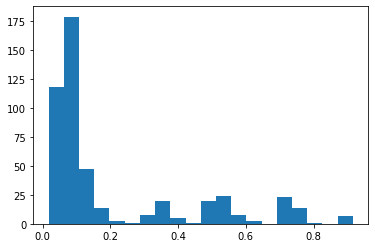

In [127]:
"histogram of missing values"
plt.hist(target_df.isna().sum()/target_df.shape[0], bins = 20)

In [134]:
" take drugs with less than 20% of missing values"
target_df = target_df.dropna(axis = 1, thresh= target_df.shape[0] * 0.8)
print(target_df.shape)

### Build ElasticNet model 

In [139]:
from PCA.ElasticNetModules import drug_model

processing drug: BRD-K92856060 (CTRP:119769)
### using raw data to fit model
number of features selected 713
Dimension of the final matrix: (716, 713)
iteration 0 begains
{(0.2, 3.059023205018258e-07): 0.06737353864900436, (0.2, 2.2603294069810542e-06): 0.06727336837102602, (0.2, 1.670170079024566e-05): 0.06694888347339747, (0.2, 0.00012340980408667956): 0.06001810414367856, (0.2, 0.0009118819655545162): 0.0491340184642, (0.2, 0.006737946999085467): 0.04729802476246788, (0.2, 0.049787068367863944): 0.17033724011486212, (0.2, 0.36787944117144233): 0.3124077726322241, (0.2, 2.718281828459045): 0.26765248315899415, (0.2, 20.085536923187668): -0.024079516828638715, (0.4, 3.059023205018258e-07): 0.06751907369939703, (0.4, 2.2603294069810542e-06): 0.0663667495562687, (0.4, 1.670170079024566e-05): 0.06437703883109741, (0.4, 0.00012340980408667956): 0.06144245216934421, (0.4, 0.0009118819655545162): 0.04959449351561012, (0.4, 0.006737946999085467): 0.07339418731683084, (0.4, 0.0497870683678639

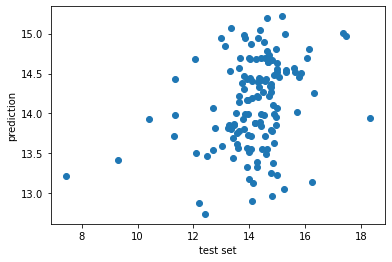

KeyboardInterrupt: 

In [157]:
comp_index = 0
target = target_df.iloc[:,comp_index]
pre = drug_model(df, target, out_path=out_path, norm_bool=False) 